# Level4

In [1]:
%matplotlib notebook

from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces

In [2]:
root = 'pdc/Level4/pdc_network/'

## Plot neuron positions - soma

In [3]:
from snudda.utils.load import SnuddaLoad 
loadeddata =  SnuddaLoad(root + "network-neuron-positions.hdf5")

posInfo = loadeddata.data
cellpositions = posInfo['neuronPositions']
type_n = [kion['name'].split('_')[0] for kion in posInfo['neurons']]


In [4]:
def plot_spike_pol_pos3d(neuron_pos,c={'dSPN' : 'lightblue','iSPN' : 'purple', 'FSN' : 'darkblue'},type_n=None,titles=None):
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.grid(False)
    ax.set_aspect('auto')
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.set_axis_off()

    for k,posi in enumerate(neuron_pos):
        
        if k%10==0:
            

            ax.scatter([posi[0]],[posi[1]], [posi[2]], c=c[type_n[k]])

            
    ax.plot(0.0039*np.ones_like(np.arange(10)),np.linspace(0.0045,0.0047,10),0.0048*np.ones_like(np.arange(10)),linewidth=3,c='black')
    ax.text(0.0040,0.0045,0.0048,r'50  $\mu$m',fontdict=legend_font)
    
    for cell, col in c.items():
        ax.scatter([],[],[],c=col,label=cell)
    plt.legend(frameon=False,prop=legend_font)
    
    plt.savefig('Level4/neuron_positions/neuronpositions.svg')
    plt.show()

<IPython.core.display.Javascript object>


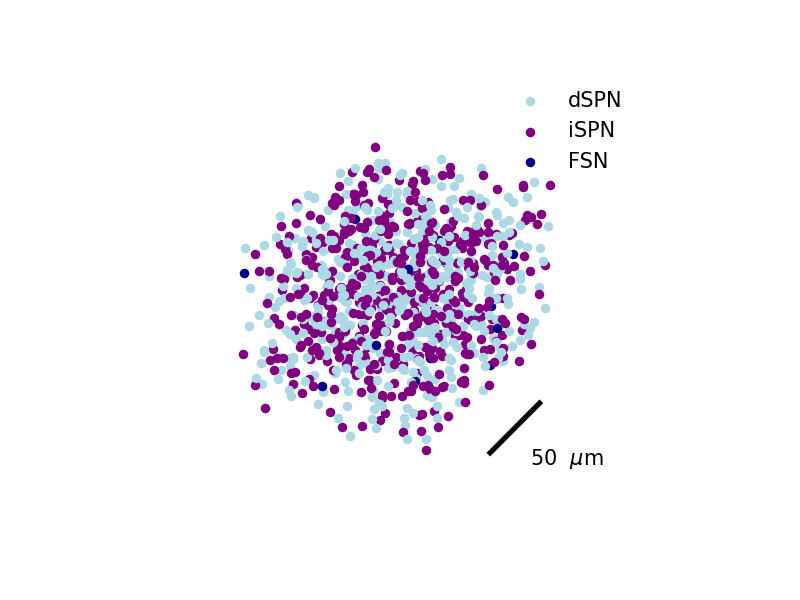

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [5]:
plot_spike_pol_pos3d(neuron_pos=cellpositions,type_n=type_n)

## Plotting activity of dSPN, iSPN and FSN following dopamine modulation - transient 700 ms

In [6]:
root = 'pdc/Level4/pdc_network/'
simroot = 'pdc/Level4/pdc_network/simulation/'
fn = [simroot + 'network-voltage-control-level4.csv',\
          simroot + 'network-voltage-DA-network-level4.csv']

nf = [root + 'network-synapses.hdf5',\
         root + 'network-synapses.hdf5']


In [7]:
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels = ['control','DA'],colours=['black','red'])


Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions


In [8]:
def plot_dopamine_control(obj_loaded_traces,type_cell=None,traces=10,sub_dir=None,skip=50):
    
    import matplotlib.pyplot as plt
    import numpy as np
        
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    
    control = np.array([*data_dict[0].values()])
    da = np.array([*data_dict[1].values()])
    
    control_m = np.mean(control,axis=0)
    control_std = np.std(control,axis=0)
    
    da_m = np.mean(da,axis=0)
    da_std = np.std(da,axis=0)
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    time = np.arange(0,3000.5,0.5)[int(50/0.5):]
    
    for i in np.arange(1,len(control),int(len(control)/traces)):
            fig = plt.figure()           
            ax = fig.add_subplot(111)
            ax.plot(time,control[i][int(50/0.5):]*1e3,c='black')
            ax.plot(time,da[i][int(50/0.5):]*1e3,c='red')
            ax.set_ylabel('Membrane potential (mV)', fontdict=legend_font)
            ax.set_xlabel('Time(ms)', fontdict=legend_font)
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*-75,c='black')
            ax.text(2500,-74,'500 ms',fontdict=legend_font)

            if max(da[i])>0:
                ax.set_ylim([-110,40])
                ax.plot(2500*np.ones_like(np.arange(-60,-40)),np.arange(-60,-40),c='black')
                ax.text(2550,-40,'20 mV',fontdict=legend_font)
            else:
                ax.set_ylim([-110,-50])
                ax.plot(2500*np.ones_like(np.arange(-80,-75)),np.arange(-80,-75),c='black')
                ax.text(2550,-78,'5 mV',fontdict=legend_font)
                
            ax.plot(700*np.ones_like(np.arange(-100,-70)),np.arange(-100,-70),c='black', linewidth=2)
            ylocs, labels = plt.yticks()
            xlocs, labels = plt.xticks()
            ylocs = [int(k) for k in ylocs]
            xlocs = [int(k) for k in xlocs]
            ax.set_xticklabels(labels=xlocs,fontdict=legend_font)
            ax.set_yticklabels(labels=ylocs,fontdict=legend_font)
            fig.savefig('/'.join(['Level4',sub_dir,'dopamine-control-traces-'+str(i)+'-'+type_cell+".svg"]))
            
    plt.show()

<IPython.core.display.Javascript object>


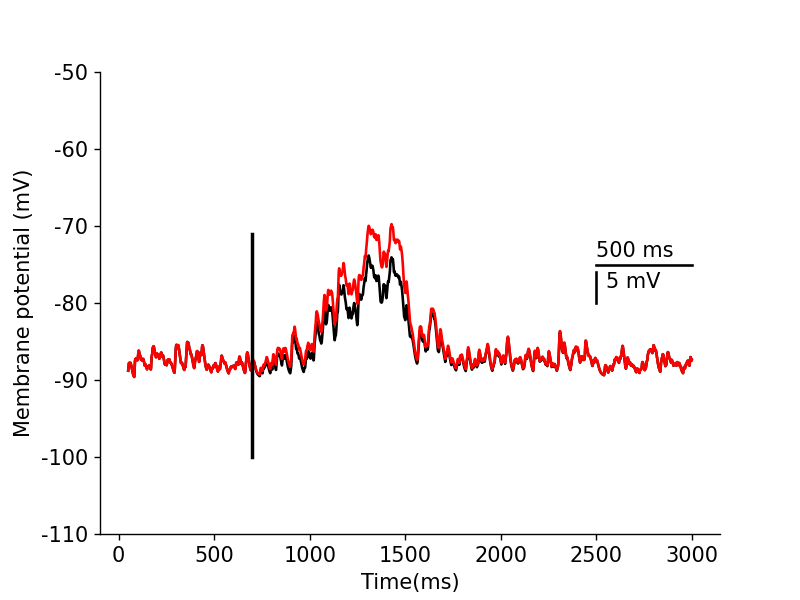

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


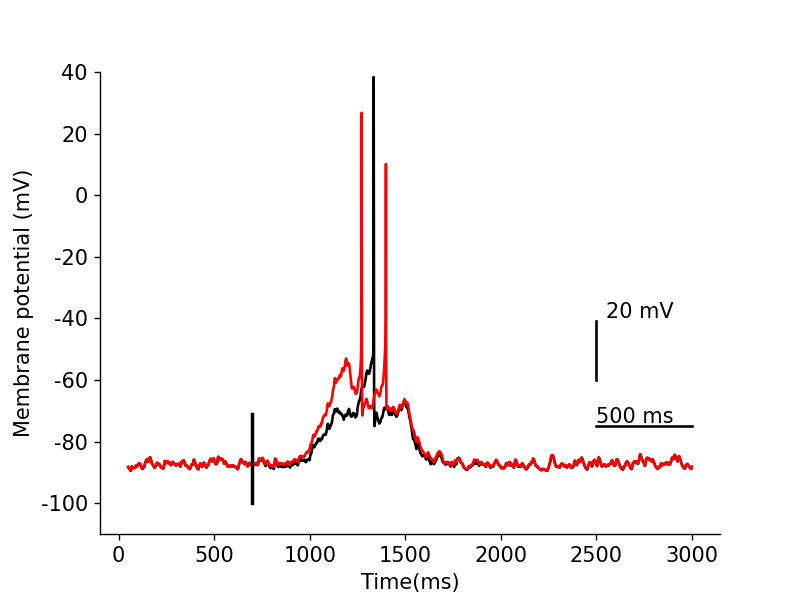

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


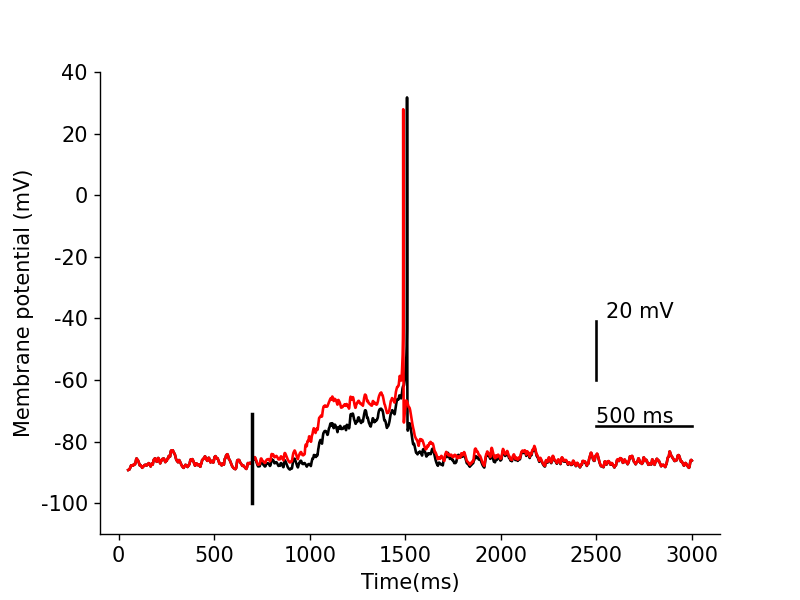

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


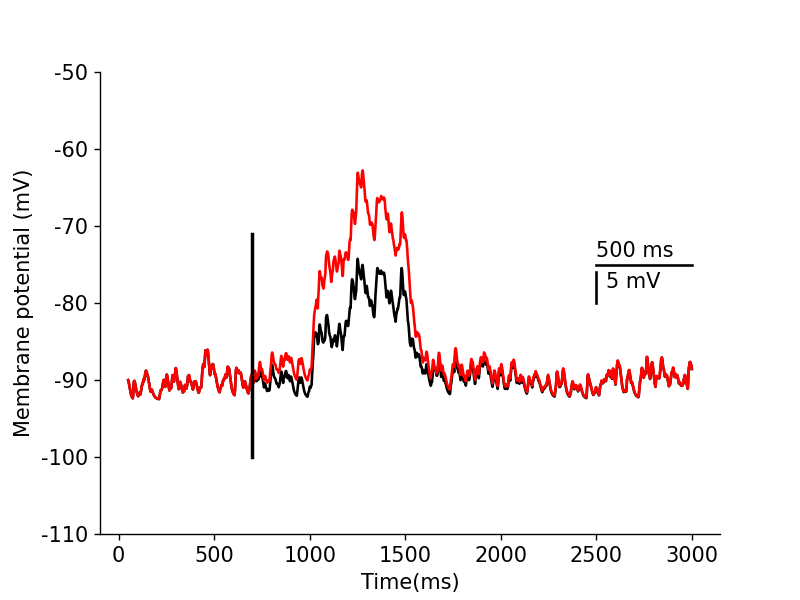

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


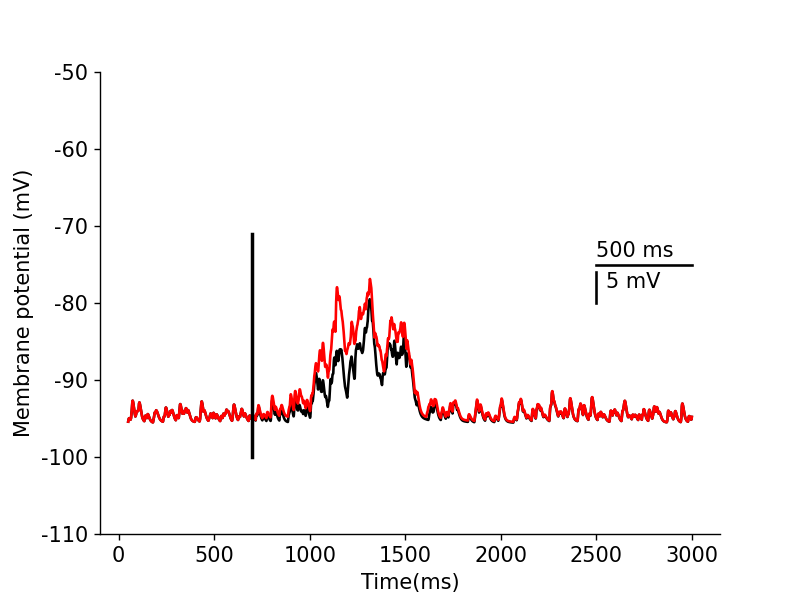

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


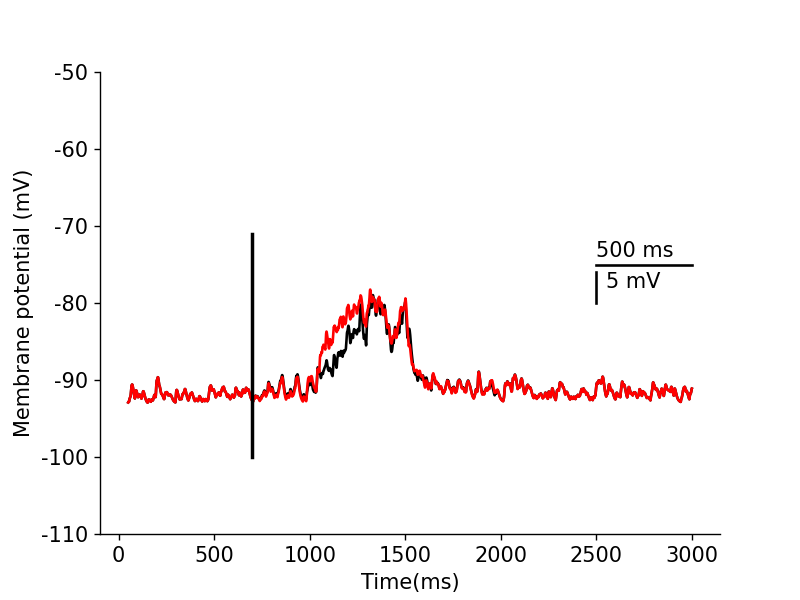

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


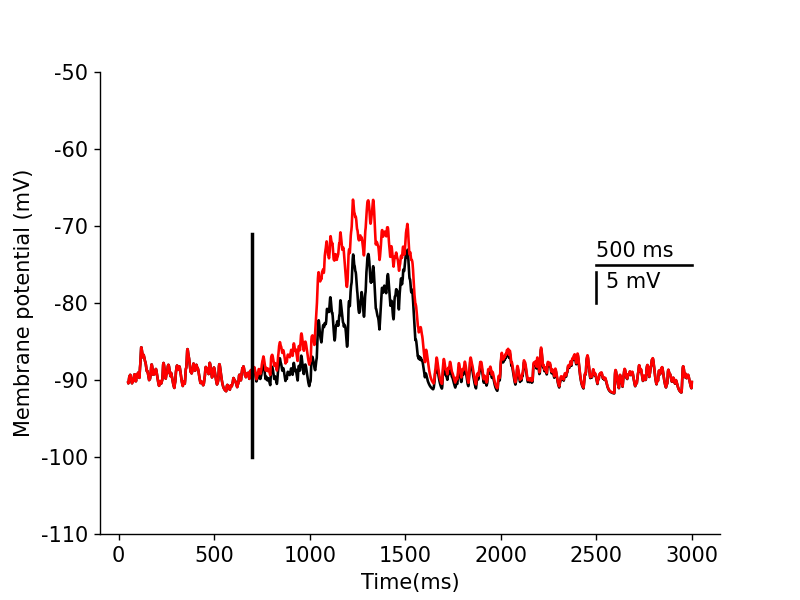

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


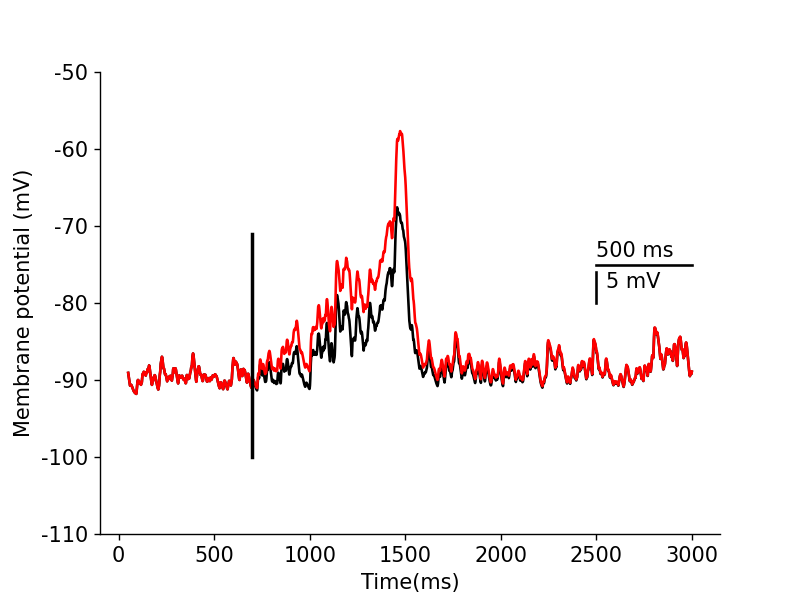

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


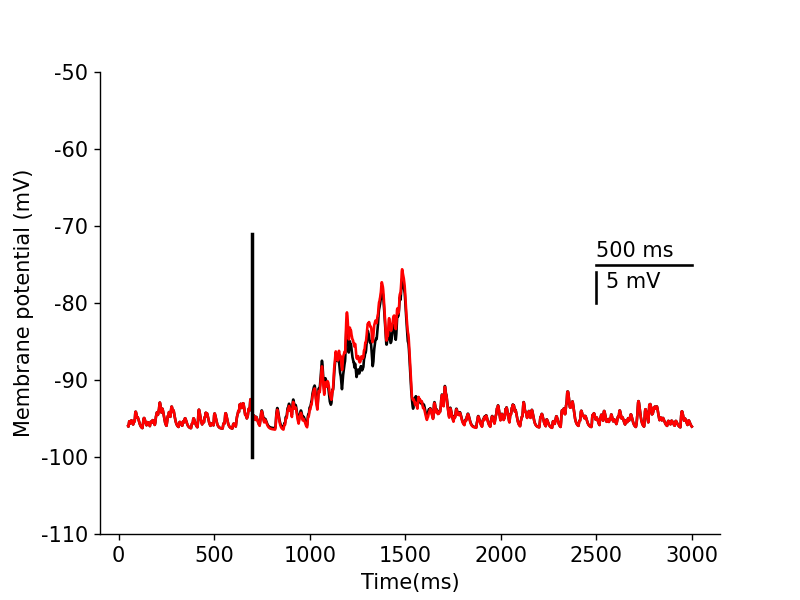

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


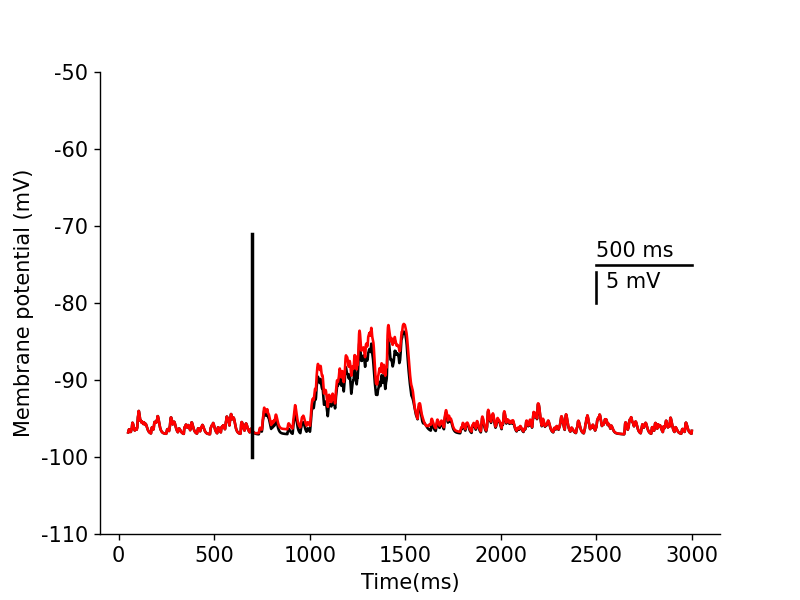

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


In [9]:
plot_dopamine_control(kl,type_cell='dSPN',traces=10,sub_dir='dSPN-dopamine')



<IPython.core.display.Javascript object>


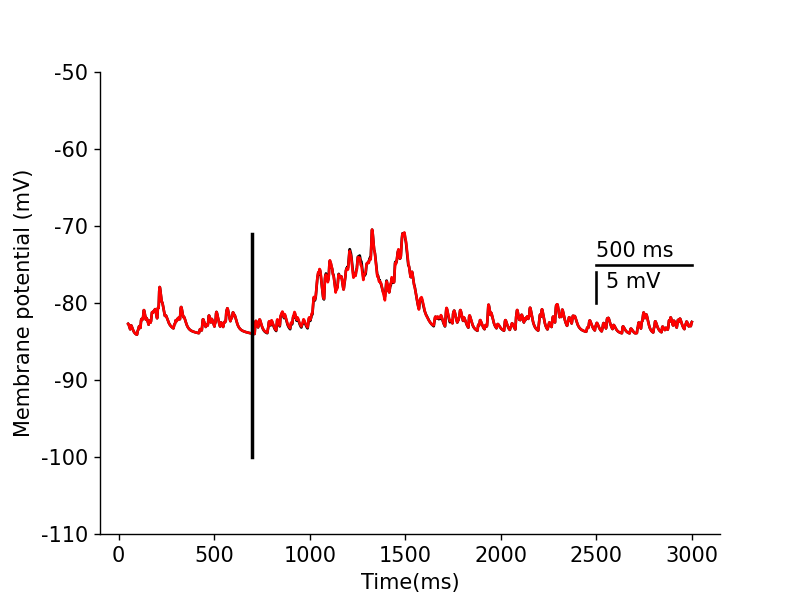

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


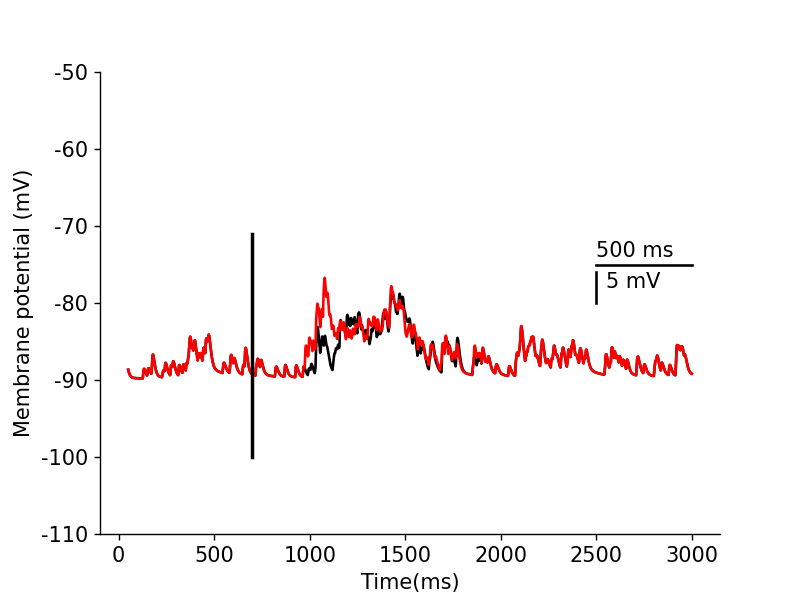

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


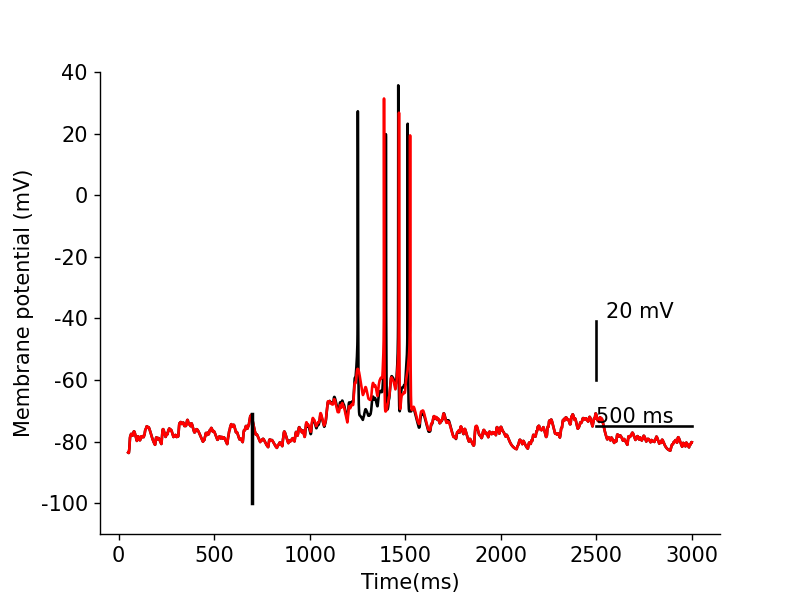

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


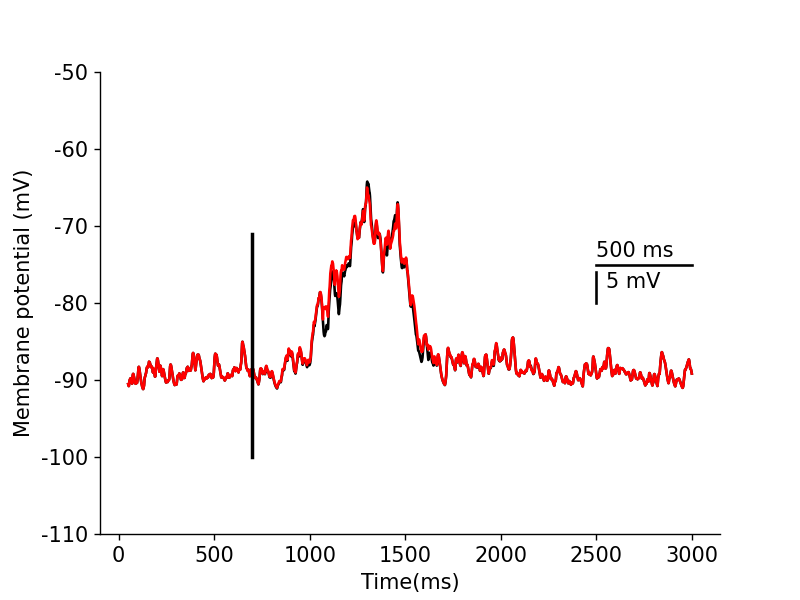

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


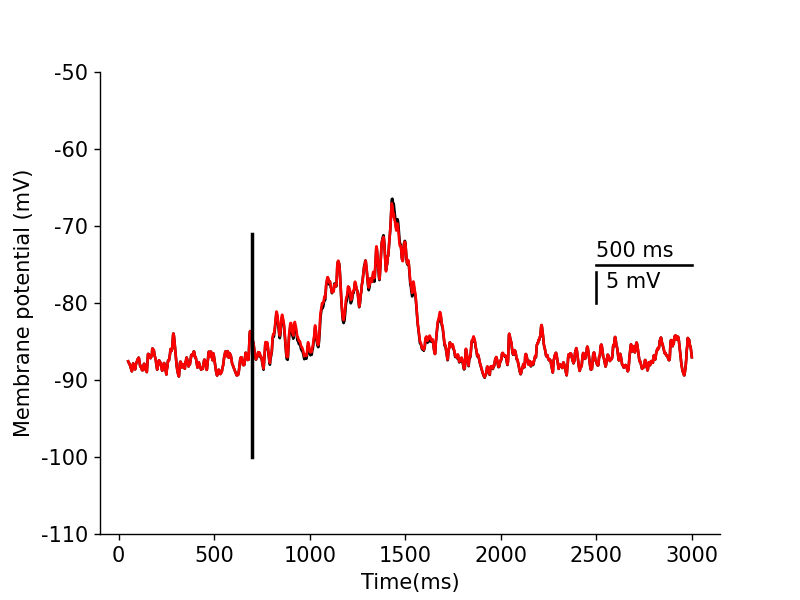

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


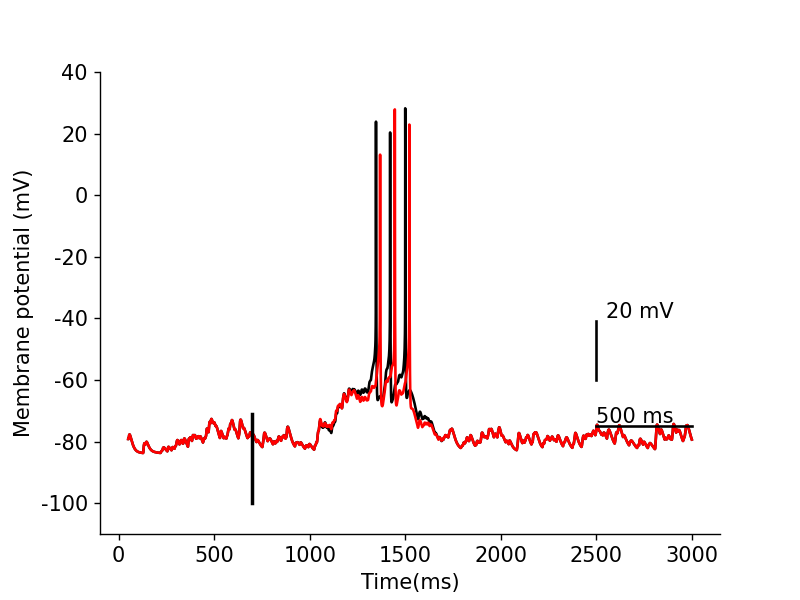

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


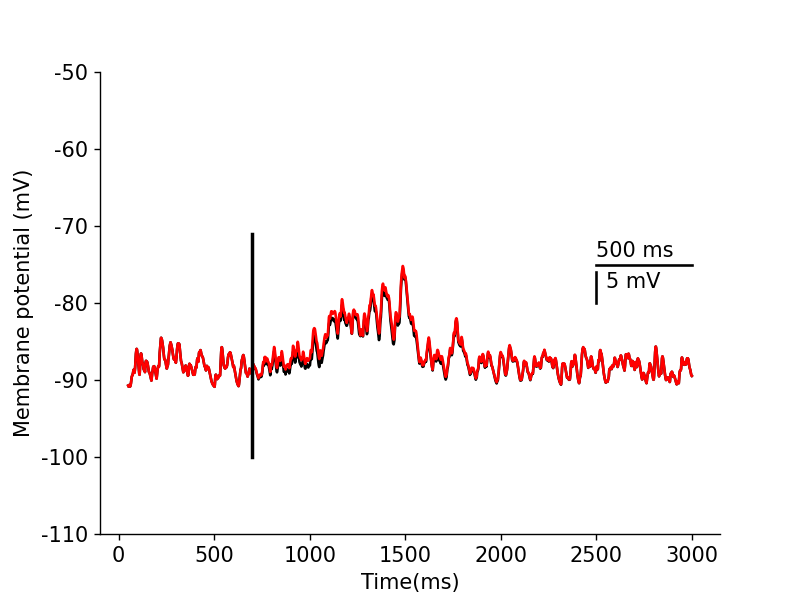

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


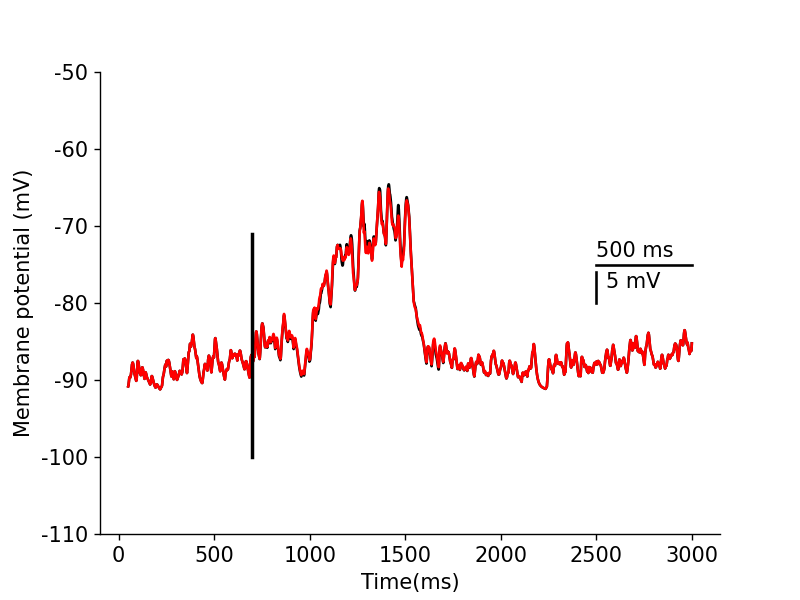

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


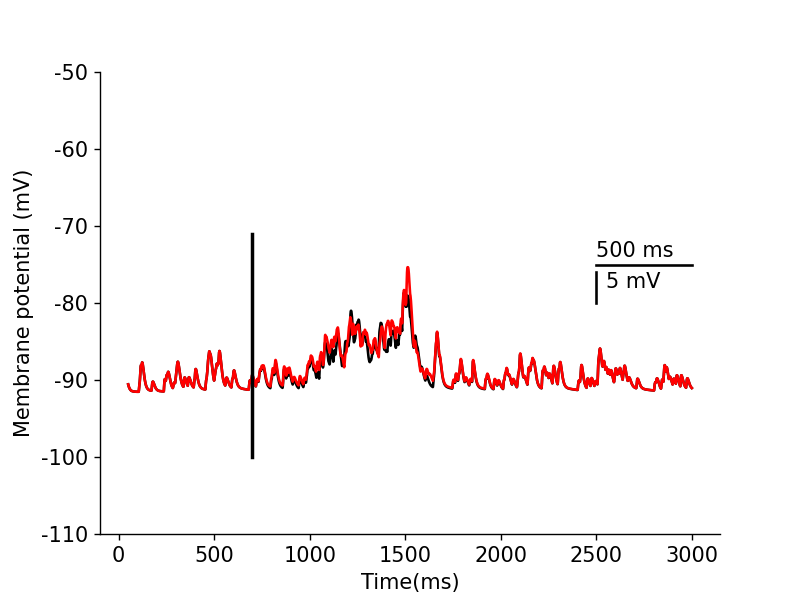

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


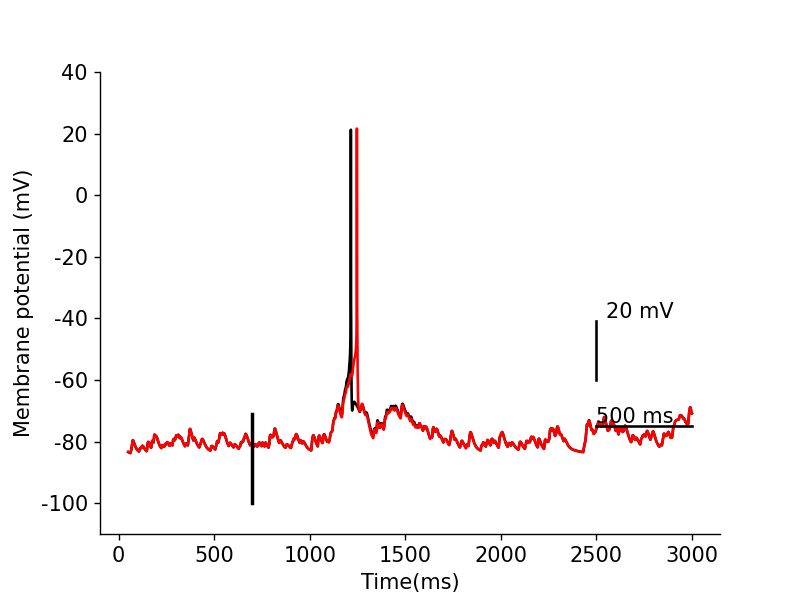

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


In [10]:
plot_dopamine_control(kl,type_cell='iSPN',traces=10,sub_dir='iSPN-dopamine')

<IPython.core.display.Javascript object>


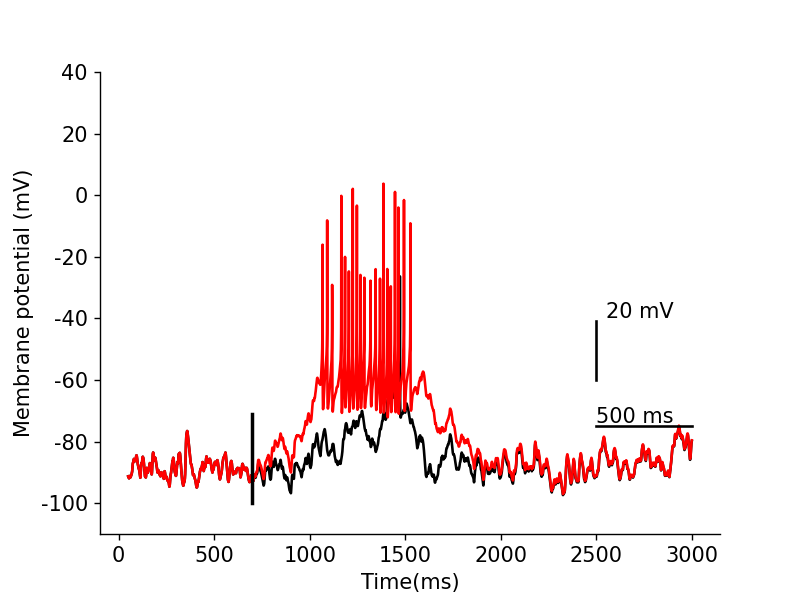

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


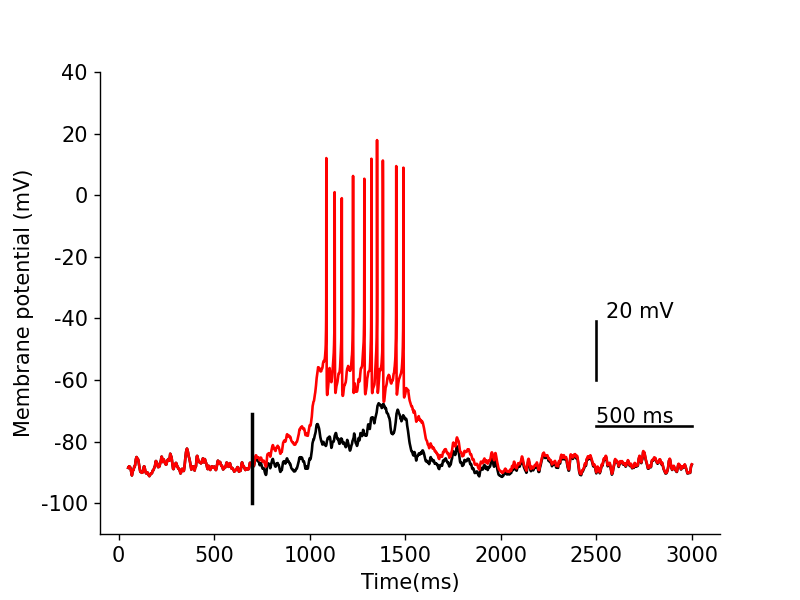

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


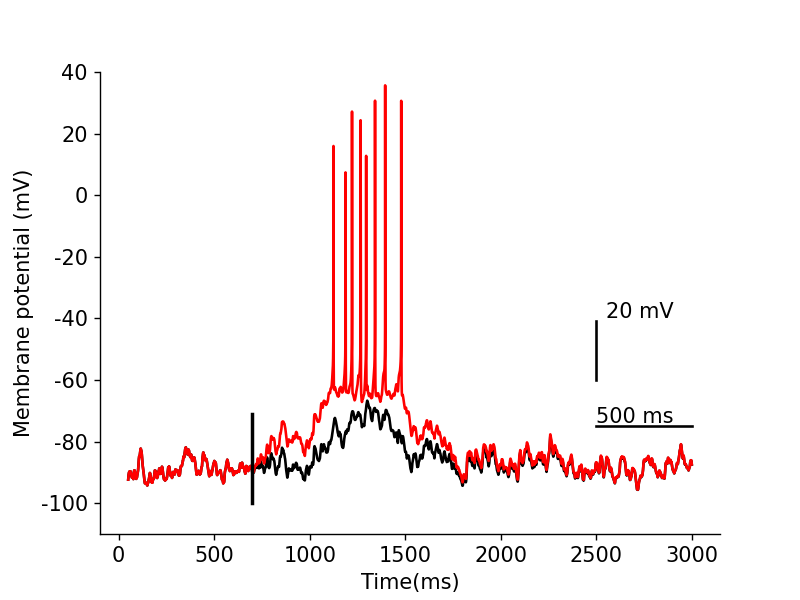

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


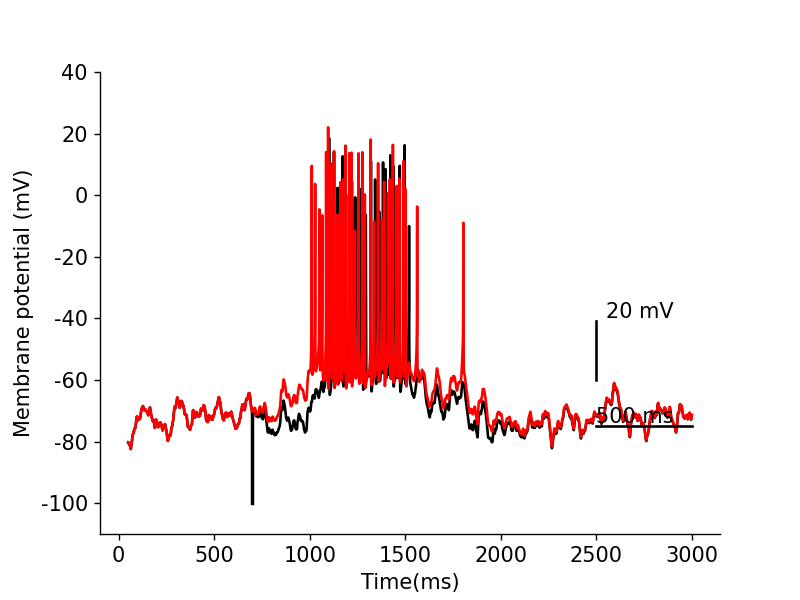

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


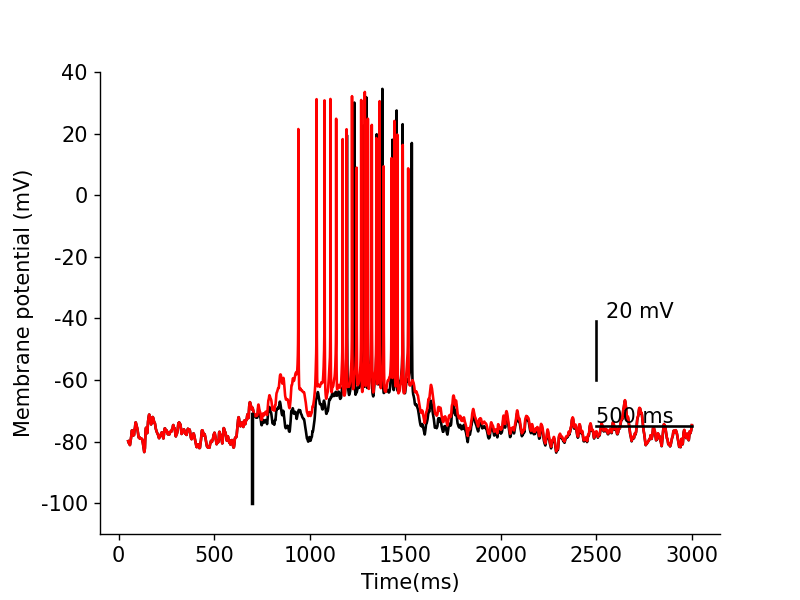

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


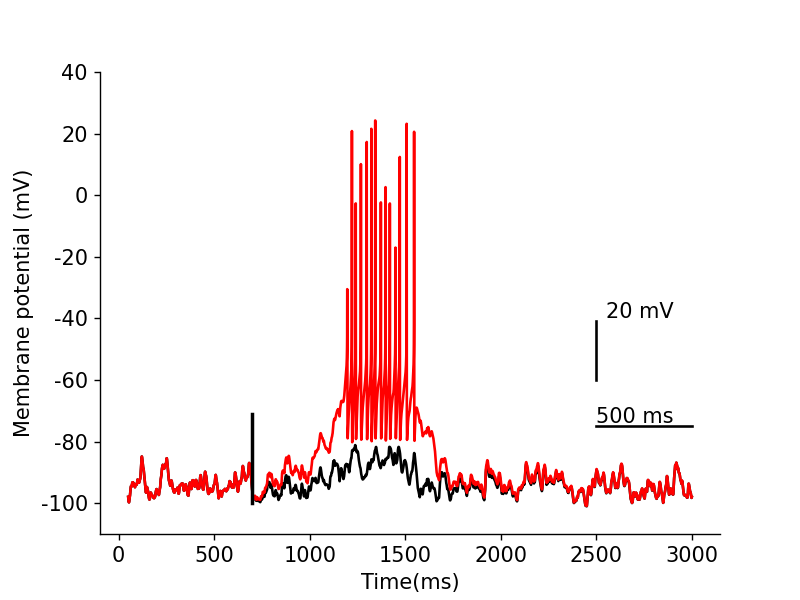

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


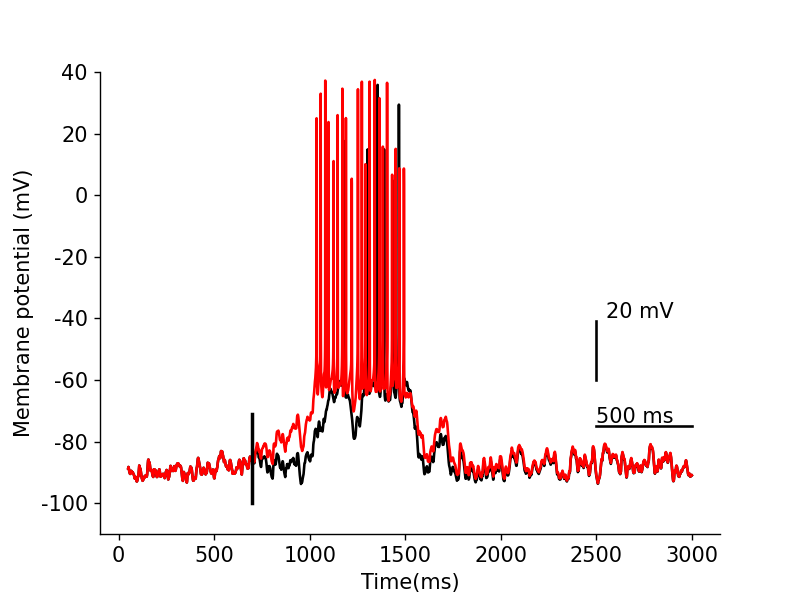

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


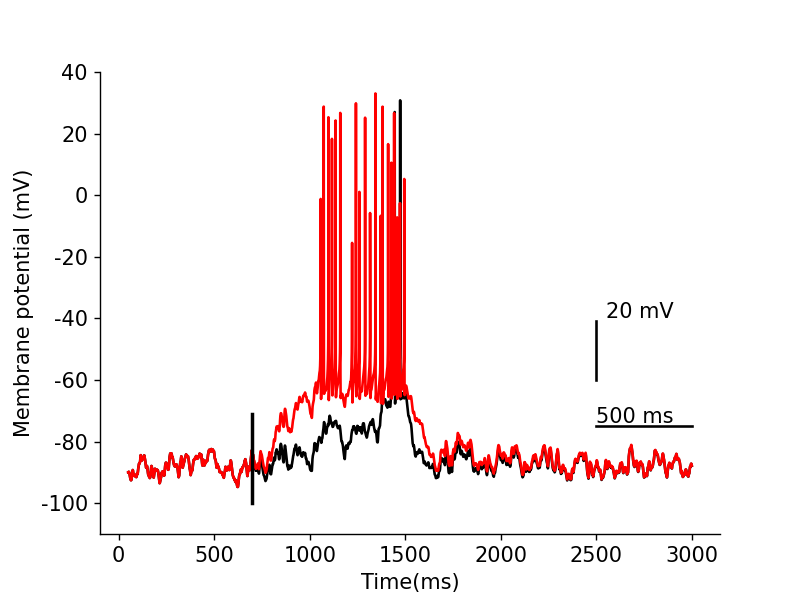

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


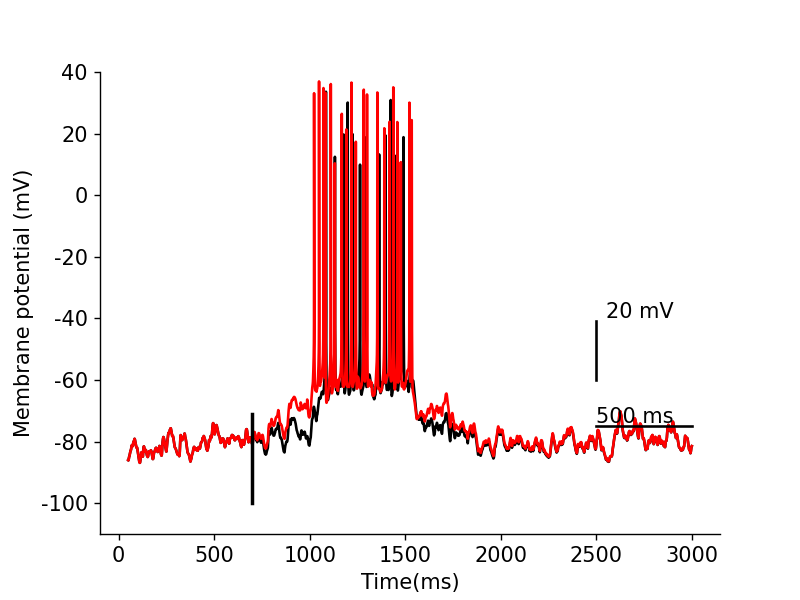

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


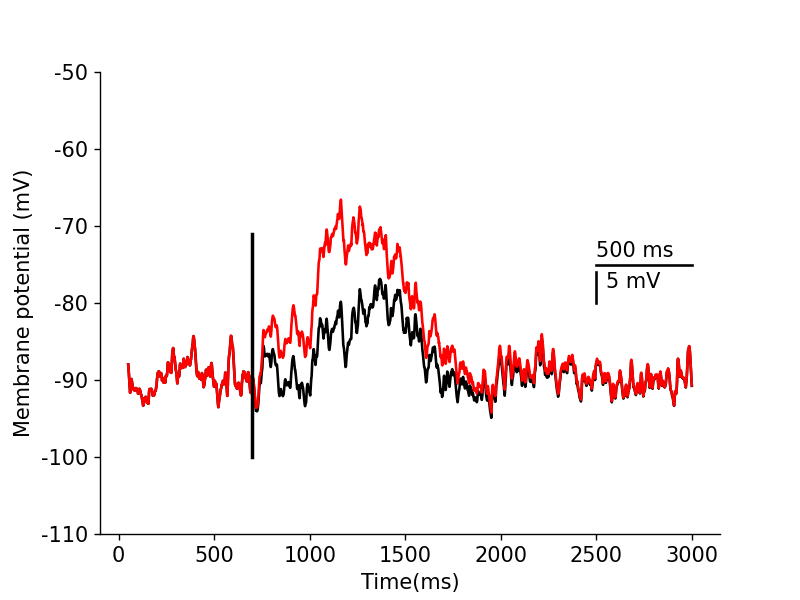

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


In [11]:
plot_dopamine_control(kl,type_cell='FSN',traces=10,sub_dir='FSN-dopamine')

## Plot activity changes in percentage of spiking neurons within the network

In [12]:
def percentage_spike(obj_loaded_traces,type_cell='dSPN',total=None):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        
        for t, voltages in data.items():
            if max(voltages)<0:
                depol=depol+1
            else:
                spike=spike+1
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'percentage': spike/total*100}})
        
    return ratio

In [13]:
def plot_percentage(percentages,chosen=[0,1],labels_v=['control','DA'],c=['black','red'],exp_title='dSPN',aspect=None):
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    for k, per in percentages.items():
        if k in chosen:
            ax.bar([k], [per['percentage']],align='center', capsize=10,width=0.4,color=c[k])
            
    ax.set_ylabel('Percentage spiking neurons (total) %',fontdict=legend_font)
    ax.set_xticks(range(len(chosen)))
    ax.set_xticklabels(labels_v,fontdict=legend_font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ylocs, labels = plt.yticks()
    ylocs = [int(k) for k in ylocs]
    ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

    ax.figure.set_size_inches(2, 4)
    plt.tight_layout()
    plt.title(exp_title,fontdict=legend_font)
    plt.savefig('/'.join(['Level4','percentage-spiking',exp_title+'_percentage.svg']))
    plt.show()

In [14]:
per_dSPN = percentage_spike(kl,type_cell='dSPN',total=5000)

In [15]:
per_iSPN = percentage_spike(kl,type_cell='iSPN',total=5000)

In [16]:
per_FSN = percentage_spike(kl,type_cell='FSN',total=100)

<IPython.core.display.Javascript object>


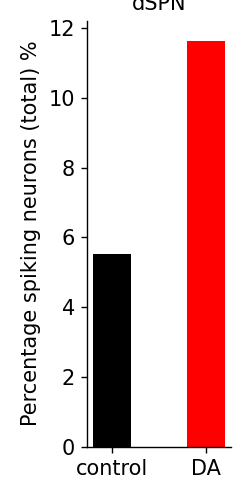

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


In [17]:
plot_percentage(per_dSPN,exp_title='dSPN',labels_v=['control','DA'],chosen=[0,1],c=['black','red'],aspect=0.4)

<IPython.core.display.Javascript object>


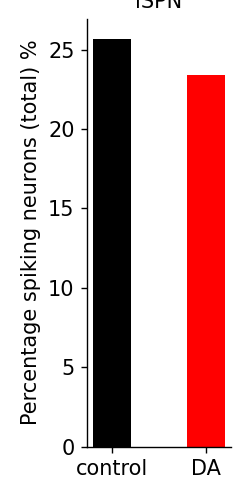

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


In [18]:
plot_percentage(per_iSPN,exp_title='iSPN',labels_v=['control','DA'],chosen=[0,1],c=['black','red'],aspect=0.2)

<IPython.core.display.Javascript object>


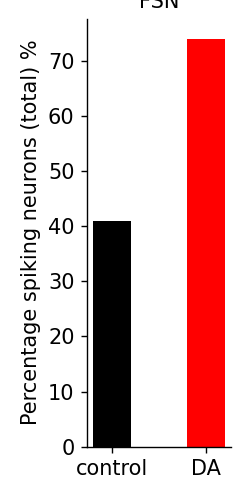

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


In [19]:
plot_percentage(per_FSN,exp_title='FSN',labels_v=['control','DA'],chosen=[0,1],c=['black','red'],aspect=0.07)

## The transients used in the simulation

In [20]:
import snudda.neuromodulation.modulation as s
import json
import numpy as np
import matplotlib.pyplot as plt

In [21]:
AChB = json.load(open('../network_parameters/modulation/acetylcholine_alpha_transient.json','r'))
AChP = json.load(open('../network_parameters/modulation/acetylcholine_pause.json','r'))

transient = [AChB,AChP]
colors = ['darkgreen','limegreen']

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}

for i,k in enumerate(transient):
    for name, info in k['description'].items(): 
        
        method = getattr(s,info['method'])
        time = np.arange(0,info['duration'],0.5)
        info['parameters'].update({'time_step_array' : time})
        ts = method(info['parameters'])
        ax.plot(time,ts-(i*0.01),color=colors[i],label=name,linewidth=4,)
        ax.set_ylabel('Modulation',fontdict=legend_font)
        ax.set_xlabel('Time (ms)',fontdict=legend_font)
        ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*0.2,c='black')
        ax.text(2500,0.22,'500 ms',fontdict=legend_font)
        ax.set_yticks([0,1])
        ax.set_yticklabels(['0','1'])
        for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
        
        ylocs, labels = plt.yticks()
        xlocs, labels = plt.xticks()
        ylocs = [int(k) for k in ylocs]
        xlocs = [int(k) for k in xlocs]
        ax.set_xticklabels(labels=xlocs,fontdict=legend_font)
        ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
ax.figure.set_size_inches(5, 4)
plt.tight_layout()
fig.savefig('Level4/transients/ACh-burst-pause-transients.svg')
plt.legend()
        
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '../network_parameters/modulation/acetylcholine_alpha_transient.json'

In [22]:
DA = json.load(open('../network_parameters/modulation/dopamine_alpha_transient.json','r'))

transient = [DA]
colors = ['red']

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}

for i,k in enumerate(transient):
    for name, info in k['description'].items(): 
        
        method = getattr(s,info['method'])
        time = np.arange(0,info['duration'],0.5)
        info['parameters'].update({'time_step_array' : time})
        ts = method(info['parameters'])
        ax.plot(time,ts,color=colors[i],label=name,linewidth=4)
        ax.set_ylabel('Modulation',fontdict=legend_font)
        ax.set_xlabel('Time (ms)',fontdict=legend_font)
        ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*0.2,c='black')
        ax.text(2500,0.22,'500 ms',fontdict=legend_font)
        ax.set_yticks([0,1])
        ax.set_yticklabels(['0','1'])
        for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
        
        ylocs, labels = plt.yticks()
        xlocs, labels = plt.xticks()
        ylocs = [int(k) for k in ylocs]
        xlocs = [int(k) for k in xlocs]
        ax.set_xticklabels(labels=xlocs,fontdict=legend_font)
        ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
ax.figure.set_size_inches(5, 4)
plt.tight_layout()
fig.savefig('Level4/transients/DA-transients.svg')
plt.legend()
        
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../network_parameters/modulation/dopamine_alpha_transient.json'

In [ ]:
%matplotlib notebook
DA = json.load(open('../network_parameters/modulation/dopamine_alpha_transient.json','r'))
DA_AChB = json.load(open('../network_parameters/modulation/acetylcholine_dopamine_alpha_transient.json','r'))
DA_AChP = json.load(open('../network_parameters/modulation/acetylcholine_dopamine_pause_transient.json','r'))
AChB = json.load(open('../network_parameters/modulation/acetylcholine_alpha_transient.json','r'))
AChP = json.load(open('../network_parameters/modulation/acetylcholine_pause.json','r'))

transient = [AChB,AChP,DA_AChB,DA_AChP,DA]
colors = [{'ACh' : 'darkgreen'}, {'ACh' : 'limegreen'}, {'DA': 'red', 'ACh' : 'darkgreen'}, {'DA': 'red','ACh' : 'limegreen'}, {'DA' : 'red'}]
legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}

for i,k in enumerate(transient):
    
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    
    for name, info in k['description'].items(): 
        
        print(name)
        
        method = getattr(s,info['method'])
        time = np.arange(0,info['duration'],0.5)
        info['parameters'].update({'time_step_array' : time})
        ts = method(info['parameters'])
        ax.plot(time,ts,color=colors[i][name],label=name,linewidth=4)
        ax.set_ylabel('Modulation',fontdict=legend_font)
        ax.set_xlabel('Time (ms)',fontdict=legend_font)
        ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*0.2,c='black')
        ax.text(2500,0.22,'500 ms',fontdict=legend_font)
        ax.set_yticks([0,1])
        ax.set_yticklabels(['0','1'])
        for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2)
        
        ylocs, labels = plt.yticks()
        xlocs, labels = plt.xticks()
        ylocs = [int(k) for k in ylocs]
        xlocs = [int(k) for k in xlocs]
        ax.set_xticklabels(labels=xlocs,fontdict=legend_font)
        ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        

    ax.figure.set_size_inches(5, 4)
    plt.tight_layout()
    fig.savefig('Level4/transients/DA-ACh-transients-'+ str(i)+'.svg')
plt.legend()
        
plt.show()


## Activity - percentage of spiking neurons within the network - All transients

In [23]:
root = 'pdc/Level4/pdc_network/'
simroot = 'pdc/Level4/pdc_network/simulation/'

fn = [simroot + 'network-voltage-control-level4.csv',\
      simroot + 'network-voltage-DA-network-level4.csv',\
      simroot + 'network-voltage-ACh-burst-network-level4.csv',\
      simroot + 'network-voltage-ACh-pause-network-level4.csv',\
      simroot + 'network-voltage-DA-ACh-burst-network-level4.csv',\
      simroot + 'network-voltage-DA-ACh-pause-network-level4.csv']

nf = [root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5']

nl = comparePlotTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control','DA', 'ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],colours=['black','red','darkgreen','limegreen','slateblue','purple'],save_dir='Compare-network/')


Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions


In [24]:
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control','DA', 'ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],colours=['black','red','darkgreen','limegreen','slateblue','purple'])


Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions


In [25]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

def firing_frequency(obj_loaded_traces,type_cell='dSPN'):

    data = obj_loaded_traces.get_traces(neuronType=type_cell)
    data_spikes = dict()
    data_average = dict()
    for ctr, network in data.items():
        data_spikes.update({ctr : dict()})
        data_average.update({ctr : dict()})
        for k, volt in network.items():
            neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
            spike = elp.spike_train_generation.threshold_detection(neov)
            data_spikes[ctr].update({k : spike})

            if len(spike) >2:
                av = elp.statistics.mean_firing_rate(spike,t_start=1 * pq.s, t_stop= 1.5 *pq.s)
                
                data_average[ctr].update({k : av})
            
    return data_spikes, data_average

In [26]:
def plot_mean_frequency(data_average,labels_v=None,color=None,exp_title=None):
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    fig, ax = plt.subplots()
    pos = 0
    for k, average in data_average.items():
        ax.bar([pos], [np.array([*average.values()]).mean()],yerr=[np.array([*average.values()]).std()],color= color[k],width=0.4, align='center',capsize=10)
        pos=pos+1
        
    ax.set_ylabel('Mean frequency (Hz)',fontdict=legend_font)
    ax.set_title('Mean frequency (Hz)',fontdict=legend_font)

    ax.figure.set_size_inches(5, 4)
    ax.set_xticks([*data_average.keys()])

    ylocs, labels = plt.yticks()
    ylocs = [int(k) for k in ylocs]
    ax.set_yticklabels(labels=ylocs,fontdict=legend_font)
    
    ax.set_xticklabels(labels_v,rotation = 90,fontdict=legend_font)
    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig('Level4/mean-frequency/'+exp_title+'_mean_freuquency.svg')
    plt.show()

In [27]:
spikes_dSPN, average_dSPN = firing_frequency(kl,type_cell='dSPN')

spikes_iSPN, average_iSPN = firing_frequency(kl,type_cell='iSPN')

spikes_FSN, average_FSN = firing_frequency(kl,type_cell='FSN')

<IPython.core.display.Javascript object>


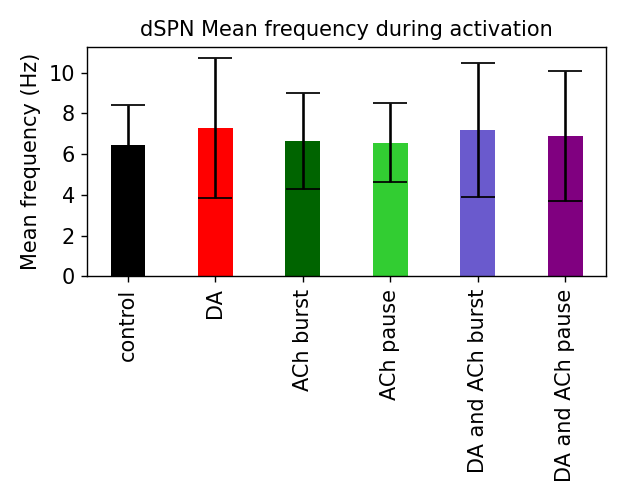

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


<IPython.core.display.Javascript object>


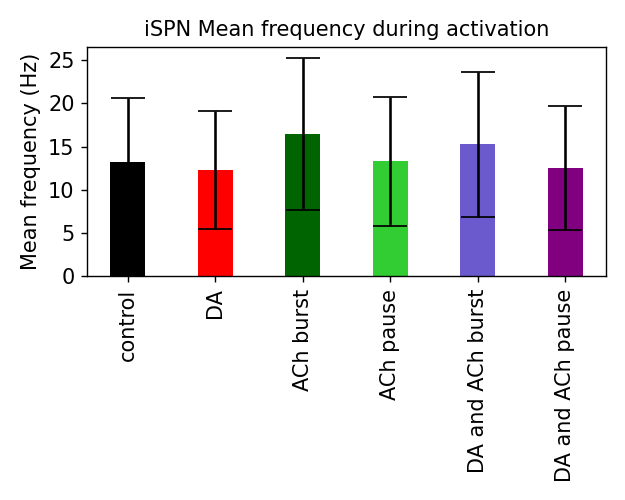

<IPython.core.display.Javascript object>


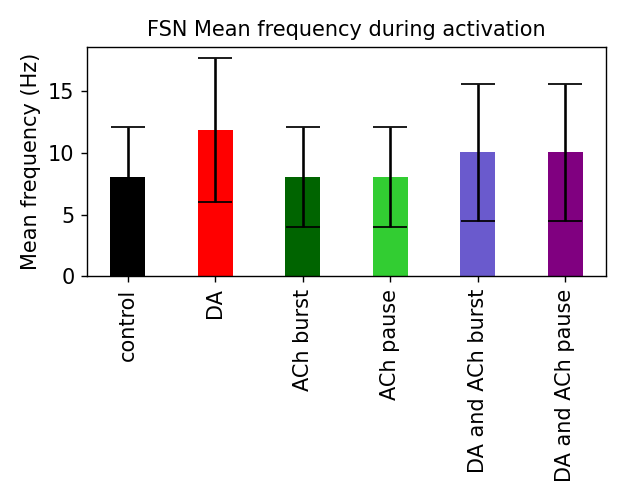

In [28]:
plot_mean_frequency(average_dSPN,labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],color=['black','red','darkgreen','limegreen','slateblue','purple'],exp_title='dSPN Mean frequency during activation')
plot_mean_frequency(average_iSPN,labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],color=['black','red','darkgreen','limegreen','slateblue','purple'],exp_title='iSPN Mean frequency during activation')
plot_mean_frequency(average_FSN,labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],color=['black','red','darkgreen','limegreen','slateblue','purple'],exp_title='FSN Mean frequency during activation')

In [29]:
def plot_percentage(percentages,chosen=[0,1],labels_v=['control','DA'],c=['black','red'],exp_title='dSPN',aspect=None):
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    for k, per in percentages.items():
        if k in chosen:
            ax.bar([k], [per['percentage']],align='center', capsize=10,width=0.4,color=c[k])
            
    ax.set_ylabel('Percentage spiking neurons (total) %',fontdict=legend_font)
    ax.set_xticks(range(len(chosen)))
    ax.set_xticklabels(labels_v,rotation = 90,fontdict=legend_font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    
    ylocs, labels = plt.yticks()
    ylocs = [int(k) for k in ylocs]
    ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

    ax.figure.set_size_inches(5, 4)
    plt.title(exp_title,fontdict=legend_font)
    plt.tight_layout()
    plt.savefig('/'.join(['Level4','percentage-spiking',exp_title+'_percentage.svg']))
    plt.show()

<IPython.core.display.Javascript object>


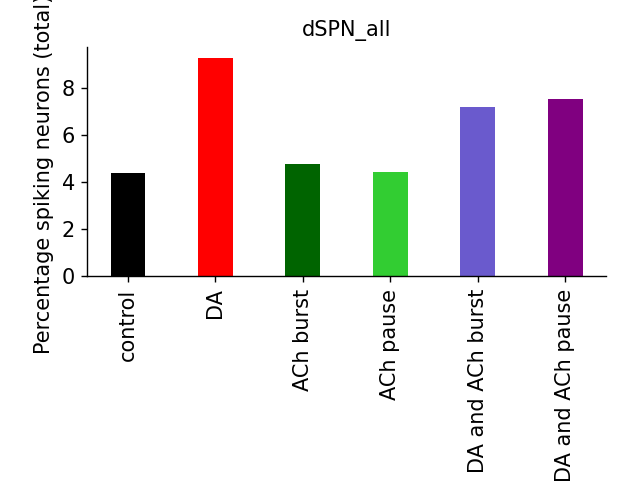

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


In [30]:
per_dSPN = percentage_spike(kl,type_cell='dSPN',total=5000)
plot_percentage(per_dSPN,exp_title='dSPN_all',labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],c=['black','red','darkgreen','limegreen','slateblue','purple'],chosen=[0,1,2,3,4,5],aspect=0.4)

<IPython.core.display.Javascript object>


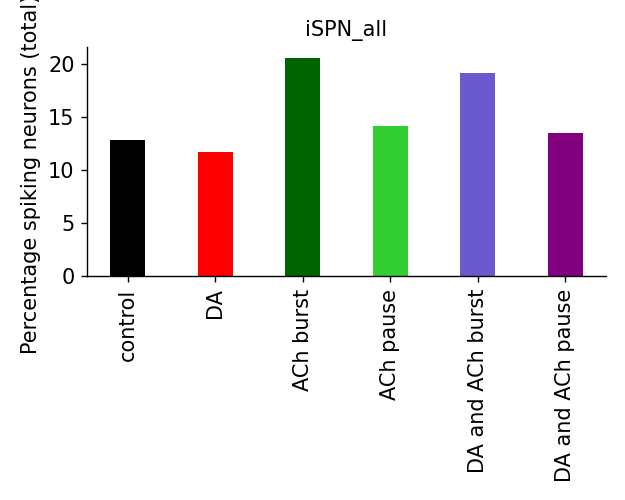

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


In [31]:
per_iSPN = percentage_spike(kl,type_cell='iSPN',total=5000)
plot_percentage(per_iSPN,exp_title='iSPN_all',labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],c=['black','red','darkgreen','limegreen','slateblue','purple'],chosen=[0,1,2,3,4,5],aspect=0.4)

<IPython.core.display.Javascript object>


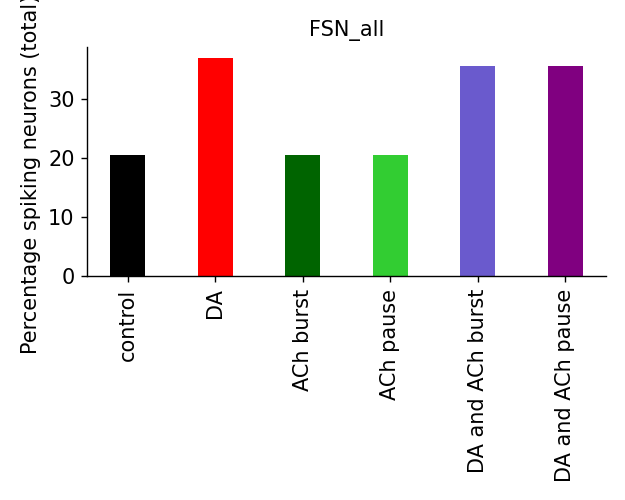

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


In [32]:
per_FSN = percentage_spike(kl,type_cell='FSN',total=100)
plot_percentage(per_FSN,exp_title='FSN_all',labels_v=[ 'control','DA','ACh burst', 'ACh pause', 'DA and ACh burst', 'DA and ACh pause'],c=['black','red','darkgreen','limegreen','slateblue','purple'],chosen=[0,1,2,3,4,5],aspect=0.4)

## Plot traces for all conditions

In [ ]:
def plot_DA_ACh_P_control(obj_loaded_traces,type_cell='dSPN'):
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    
   
    
    control = np.array([*data_dict[5].values()])

    da = np.array([*data_dict[3].values()])
    
    control_m = np.mean(control,axis=0)
    control_std = np.std(control,axis=0)
    
    da_m = np.mean(da,axis=0)
    da_std = np.std(da,axis=0)
    
    
    time = np.arange(0,3000.5,0.5)
    for i in np.arange(1,1000,10):
            fig = plt.figure()           
            ax = fig.add_subplot(111)
            ax.plot(time,control[i]*1e3,c='black')
            ax.plot(time,da[i]*1e3,c='red')
            ax.set_ylabel('Membrane potential (mV)')
            ax.set_xlabel('Time(ms)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*-75,c='black')
            ax.text(2500,-74,'500 ms')

            if max(da[i])>0:
                ax.set_ylim([-100,40])
                ax.plot(2500*np.ones_like(np.arange(-60,-40)),np.arange(-60,-40),c='black')
                ax.text(2550,-40,'20 mV')
            else:
                ax.set_ylim([-100,-70])
                ax.plot(2500*np.ones_like(np.arange(-80,-75)),np.arange(-80,-75),c='black')
                ax.text(2550,-78,'5 mV')
            
            fig.savefig('Level4/DA-P-control-traces'+str(i)+".svg")
            
    plt.figure()
    
    plt.plot(time,control_m,c='black')
    plt.plot(time,da_m,c='red')
    plt.fill_between(time,control_m-control_std,control_m+control_std,alpha=.1,color='black')
    plt.fill_between(time,da_m-da_std,da_m+da_std,alpha=.1,color='red')      
    
    plt.show()

In [ ]:
def plot_DA_ACh_B_control(obj_loaded_traces,type_cell='dSPN'):
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    
   
    
    control = np.array([*data_dict[5].values()])

    da = np.array([*data_dict[2].values()])
    
    control_m = np.mean(control,axis=0)
    control_std = np.std(control,axis=0)
    
    da_m = np.mean(da,axis=0)
    da_std = np.std(da,axis=0)
    
    
    time = np.arange(0,3000.5,0.5)
    for i in np.arange(1,1000,10):
            fig = plt.figure()           
            ax = fig.add_subplot(111)
            ax.plot(time,control[i]*1e3,c='black')
            ax.plot(time,da[i]*1e3,c='red')
            ax.set_ylabel('Membrane potential (mV)')
            ax.set_xlabel('Time(ms)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*-75,c='black')
            ax.text(2500,-74,'500 ms')

            if max(da[i])>0:
                ax.set_ylim([-100,40])
                ax.plot(2500*np.ones_like(np.arange(-60,-40)),np.arange(-60,-40),c='black')
                ax.text(2550,-40,'20 mV')
            else:
                ax.set_ylim([-100,-70])
                ax.plot(2500*np.ones_like(np.arange(-80,-75)),np.arange(-80,-75),c='black')
                ax.text(2550,-78,'5 mV')
            
            fig.savefig('Level4/DA-B-control-traces'+str(i)+".svg")
            
    plt.figure()
    
    plt.plot(time,control_m,c='black')
    plt.plot(time,da_m,c='red')
    plt.fill_between(time,control_m-control_std,control_m+control_std,alpha=.1,color='black')
    plt.fill_between(time,da_m-da_std,da_m+da_std,alpha=.1,color='red')      
    
    plt.show()

In [ ]:
plot_DA_ACh_P_control(kl,type_cell='FSN')

In [ ]:
plot_DA_ACh_P_control(kl,type_cell='dSPN')

In [ ]:
plot_DA_ACh_B_control(kl,type_cell='dSPN')

In [ ]:
plot_DA_ACh_B_control(kl,type_cell='FSN')

In [ ]:
def plot_AChB_control(obj_loaded_traces,type_cell='dSPN'):
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    
   
    
    control = np.array([*data_dict[5].values()])

    da = np.array([*data_dict[0].values()])
    
    control_m = np.mean(control,axis=0)
    control_std = np.std(control,axis=0)
    
    da_m = np.mean(da,axis=0)
    da_std = np.std(da,axis=0)
    
    
    time = np.arange(0,3000.5,0.5)
    for i in np.arange(1,1000,10):
            fig = plt.figure(i)           
            ax = fig.add_subplot(111)
            ax.plot(time,control[i]*1e3,c='black')
            ax.plot(time,da[i]*1e3,c='red')
            ax.set_ylabel('Membrane potential (mV)')
            ax.set_xlabel('Time(ms)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*-75,c='black')
            ax.text(2500,-74,'500 ms')

            if max(da[i])>0:
                ax.set_ylim([-100,40])
                ax.plot(2500*np.ones_like(np.arange(-60,-40)),np.arange(-60,-40),c='black')
                ax.text(2550,-40,'20 mV')
            else:
                ax.set_ylim([-100,-70])
                ax.plot(2500*np.ones_like(np.arange(-80,-75)),np.arange(-80,-75),c='black')
                ax.text(2550,-78,'5 mV')
            
            fig.savefig('Level4/AChB-control-traces'+str(i)+".svg")
            
    plt.figure(0)
    
    plt.plot(time,control_m,c='black')
    plt.plot(time,da_m,c='red')
    plt.fill_between(time,control_m-control_std,control_m+control_std,alpha=.1,color='black')
    plt.fill_between(time,da_m-da_std,da_m+da_std,alpha=.1,color='red')      
    
    plt.show()

In [ ]:
plot_AChB_control(kl,type_cell='dSPN')




In [ ]:
plot_AChB_control(kl,type_cell='iSPN')